# Project 10 -- [NAMAN] [KANSAL]

**TA Help:** (for instance) John Smith, Alice Jones, etc., list names of any TAs who helped you

- For example: Help with figuring out how to write a function (describe the tasks that they helped you with)

**Collaboration:** My Friend in CS, My Uncle, Another Student, etc., list names of any other people who helped you

(describe the tasks that they helped you with)
- For example: helped figuring out how to load the dataset.
- Another example: helped debug error with my plot.

**Internet Resources:** Stack Exchange, Stack Overflow, etc.

(describe any information that you learned from internet resources, including the URLs)
- data frames in Pandas versus R from StackOverflow  https://stackoverflow.com/questions/8991709/why-were-pandas-merges-in-python-faster-than-data-table-merges-in-r-in-2012

**ChatGPT, Gemini, Claude, etc:** Any language models or generative AI chatbots that helped you.

(if you used any such tools, please tell us here)
- For example:  I asked ChatGPT how to define a new data frames
- Another example:  Gemini told me how to make a function for sorting my data

- ***Link to AI Chat History***: Please share a link to your chat if you used AI (ex. ChatGPT Shared Links)
**OVERALL MESSAGE:** Any time that you used anything except your brain to solve the questions in these projects, you need to disclose such resources at the start of the project, with details about your usage of the tools.

**YOUR OWN WORK:** Even when you utilize other resources, do NOT just copy and paste.  Write all explanations in your own words, using several sentences in English, which are understandable and which you wrote (and did not just copy and paste).

## Question 1

Name     Sex Counts
1 Emily    F   21411 
2 Emma     F   19128 
3 Madison  F   18635 
4 Isabella F   18231 
5 Ava      F   16941 
6 Abigail  F   15633

Name     Sex Counts
1 Emily    F   25735 
2 Jessica  F   21045 
3 Ashley   F   20896 
4 Sarah    F   20716 
5 Hannah   F   20596 
6 Samantha F   20170

Name  Year Count
1 Alan  1997  2184
2 Alan  2006  3481
3 Eric  1997 10354
4 Eric  2006  6242
5 Avery 1997  2110
6 Avery 2006  7048

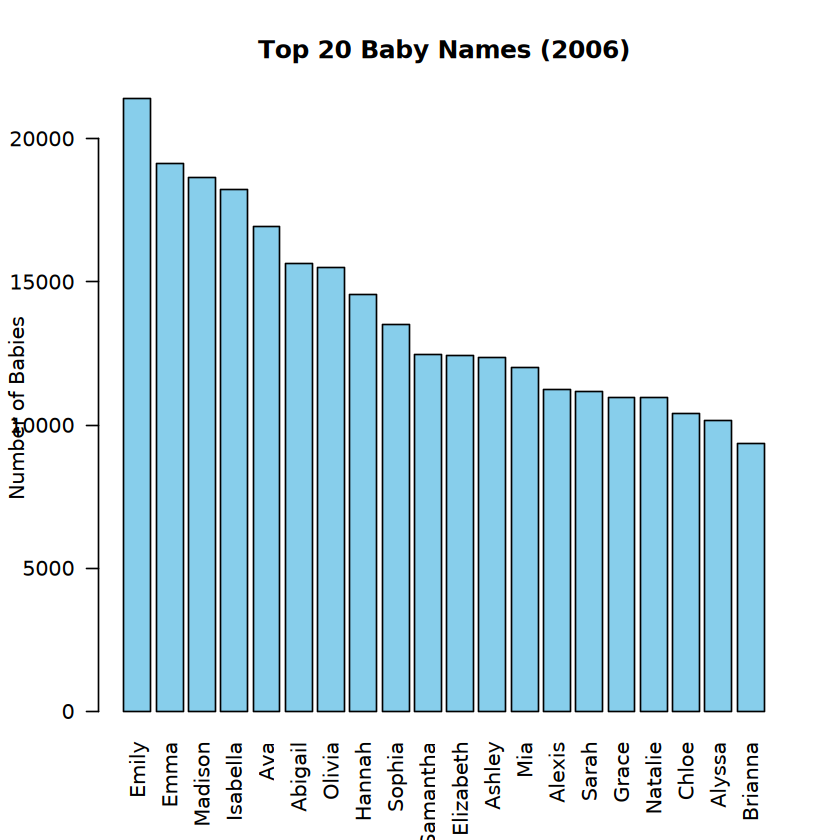

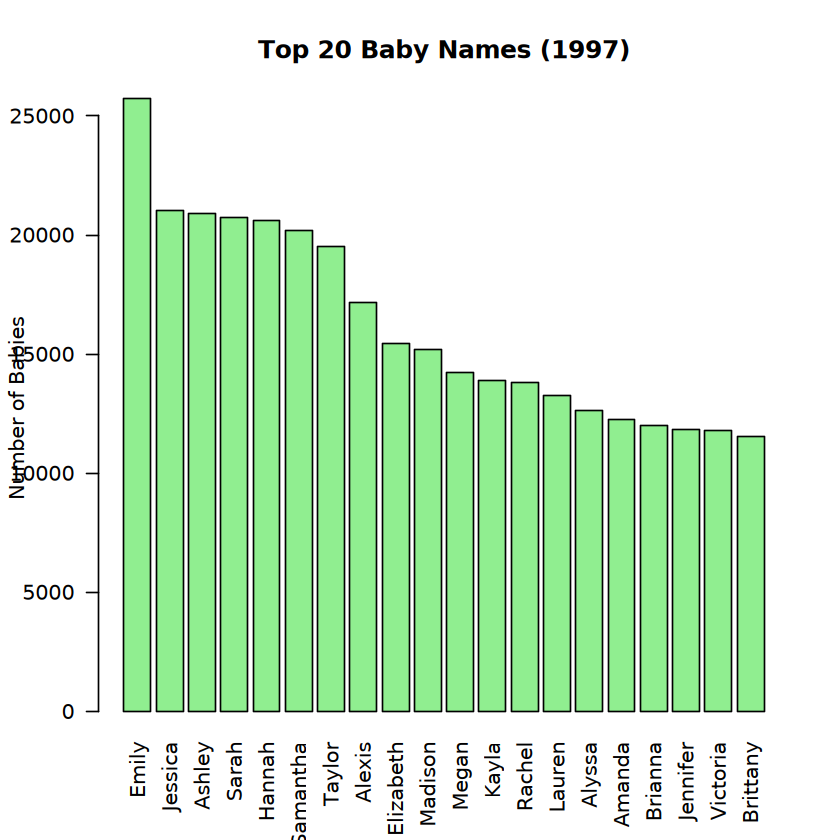

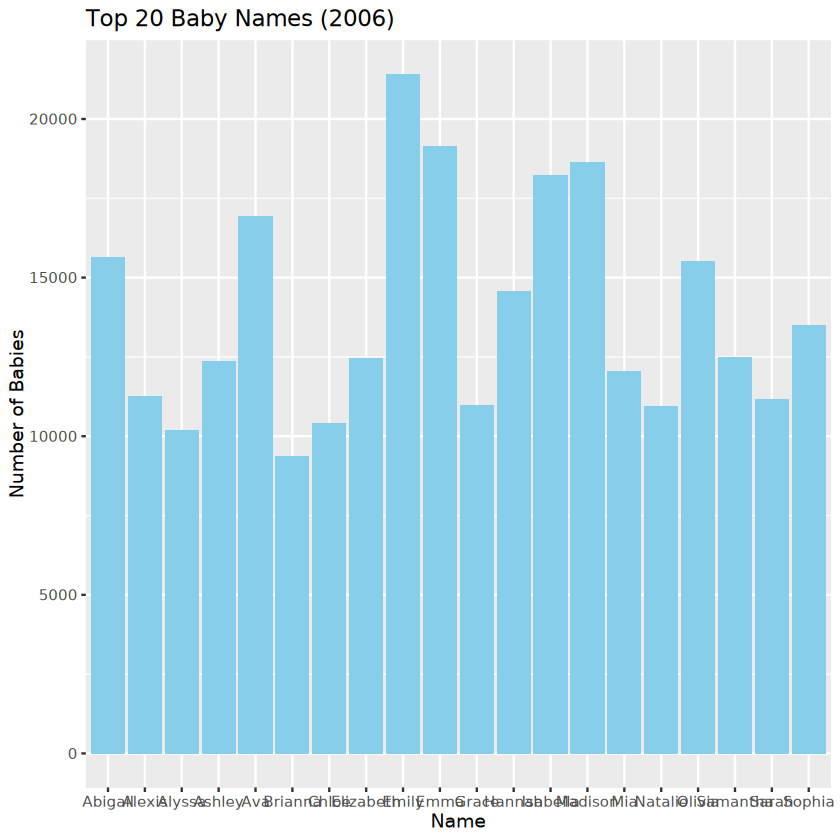

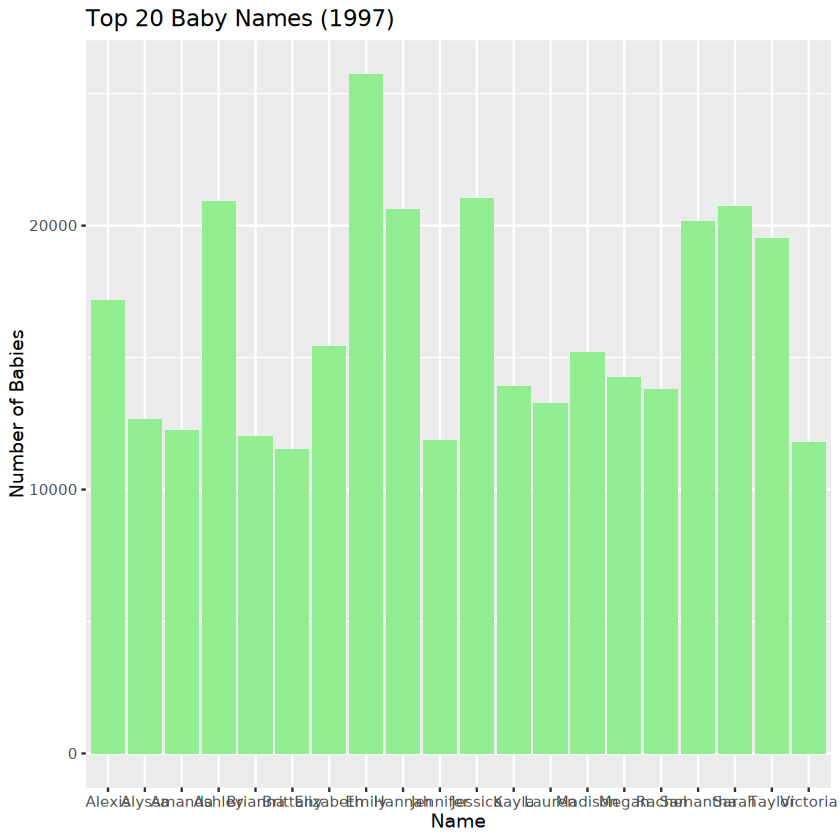

In [2]:
library(dplyr)
library(ggplot2)
myDF <- read.table("/anvil/projects/tdm/data/ssa/yob2006.txt", sep = ",", header = FALSE)
the_1997 <- read.table("/anvil/projects/tdm/data/ssa/yob1997.txt", sep = ",", header = FALSE)
colnames(myDF) <- c("Name", "Sex", "Counts")
colnames(the_1997) <- c("Name", "Sex", "Counts")
head(myDF)
head(the_1997)
name_alan <- myDF[myDF$Name == 'Alan',  ]
name_eric <- myDF[myDF$Name == 'Eric',  ]
name_avery <- myDF[myDF$Name == 'Avery',  ]
name_alan_1997 <- the_1997[the_1997$Name == 'Alan',  ]
name_eric_1997 <- the_1997[the_1997$Name == 'Eric',  ]
name_avery_1997 <- the_1997[the_1997$Name == 'Avery',  ]
compare_names <- data.frame(
  Name = c("Alan", "Alan", "Eric", "Eric", "Avery", "Avery"),
  Year = c(1997, 2006, 1997, 2006, 1997, 2006),
  Count = c(sum(name_alan_1997$Counts), sum(name_alan$Counts),
            sum(name_eric_1997$Counts), sum(name_eric$Counts),
            sum(name_avery_1997$Counts), sum(name_avery$Counts))
)

compare_names
top_20_2006 <- head(myDF,20)
top_20_1997 <- head(the_1997,20)
barplot(top_20_2006$Counts,
        names.arg = top_20_2006$Name,
        las = 2,
        col = "skyblue",
        main = "Top 20 Baby Names (2006)",
        ylab = "Number of Babies")

barplot(top_20_1997$Counts,
        names.arg = top_20_1997$Name,
        las = 2,
        col = "lightgreen",
        main = "Top 20 Baby Names (1997)",
        ylab = "Number of Babies")
ggplot(top_20_2006, aes(x = Name, y = Counts)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Top 20 Baby Names (2006)", x = "Name", y = "Number of Babies") 
ggplot(top_20_1997, aes(x = Name, y = Counts)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Top 20 Baby Names (1997)", x = "Name", y = "Number of Babies") 

# Explanation of Code

- **Lines 1–2:** Load the required libraries — `dplyr` for data manipulation and `ggplot2` for creating plots and visualizations.  

- **Lines 3–4:** Read the baby name datasets for 2006 and 1997 using `read.table()`.  
  These files are comma-separated and do not have header rows, so `header = FALSE` is specified.  

- **Lines 5–6:** Assign column names `Name`, `Sex`, and `Counts` to both datasets so that each column clearly represents the baby name, the gender, and the count of babies given that name.  

- **Lines 7–8:** Display the first few rows of each dataset using `head()` to confirm that the data was read correctly and columns are labeled properly.  

- **Lines 9–11:** Create subsets from the 2006 dataset for the names `"Alan"`, `"Eric"`, and `"Avery"`.  
  Each subset includes all rows where the `Name` column matches one of those values.  

- **Lines 12–14:** Create corresponding subsets from the 1997 dataset for the same three names (`"Alan"`, `"Eric"`, and `"Avery"`).  

- **Lines 15–20:** Build a new data frame `compare_names` that combines the total counts of each name from both years.  
  The `sum()` function adds up the counts for each name (in case they appear for multiple sexes).  
  Each row shows the year, the name, and its total count.  

- **Line 22:** Display the `compare_names` data frame to verify that the combined comparison table is correct.  

- **Lines 23–24:** Select the first 20 rows of each dataset (for 2006 and 1997) and store them as `top_20_2006` and `top_20_1997`.  
  These represent the top 20 most common names in each year (assuming data is already sorted by count).  

- **Lines 25–30:** Create a barplot in base R for the 2006 dataset.  
  The bars show the number of babies (`Counts`) for each of the top 20 names.  
  `las = 2` rotates the x-axis labels for better readability, and the color `skyblue` gives a clear visual appearance.  

- **Lines 31–36:** Create a similar barplot for the 1997 dataset.  
  The bars are colored `lightgreen` and labeled with the same structure as the 2006 plot, providing a direct comparison between the two years.  

- **Lines 37–39:** Use `ggplot2` to recreate the 2006 barplot in a cleaner and more customizable format.  
  `geom_bar(stat = "identity")` draws bars with heights corresponding to actual counts, and `labs()` adds clear axis titles and a plot title.  

- **Lines 40–42:** Repeat the same process for the 1997 dataset using `ggplot2`.  
  The plot uses `lightgreen` fill color and identical axis labels to maintain consistency between both visualizations.  
# Deliverables – Question 1

---

### **1.1 How has the popularity of the selected names shifted over the years?**

- The comparison table shows that `Alan` increased slightly from 2184 babies in 1997 to 3481 in 2006.  
- `Eric` declined noticeably from 10 354 babies in 1997 to 6242 in 2006.  
- `Avery` rose sharply from 2110 babies in 1997 to 7048 in 2006.  
- Overall, **traditional names like Eric** became less common, while **modern names like Avery** gained popularity over the decade.  
  This indicates a generational shift toward newer naming trends and away from names that were popular in the 1990s.

---

### **1.2 Barplots of the Top 20 Baby Names**

- Two barplots were created in **base R**:  
  one for the top 20 names in 1997 and another for 2006.  
  Each plot shows the total number of babies for the most frequent names, using different colors (`skyblue` for 2006 and `lightgreen` for 1997).  
  Axis labels and titles clearly identify the year and variable plotted.

- The same two plots were then reproduced using **ggplot2**, which provided a cleaner and more customizable format.  
  Each ggplot used `geom_bar(stat = "identity")` to draw bars with heights equal to actual counts,  
  and `labs()` to add meaningful titles and axis labels.  
  The color scheme matched the base R plots to maintain consistency.

---

### **1.3 Explanation of Working in ggplot2**

- To begin working with `ggplot2`, the package was first loaded using `library(ggplot2)`.  
  Then, a basic plot structure was defined with `ggplot(data, aes(x = Name, y = Counts))`.  
  The layer `geom_bar(stat = "identity")` was added to create bars that represent the true counts of each name.  
- Titles and axis labels were customized using `labs()`, and the bar colors were specified with the `fill` argument.  
  Compared with the base R plots, the ggplot2 version produced a smoother, more modern visualization that’s easier to read and extend.  


## Question 2

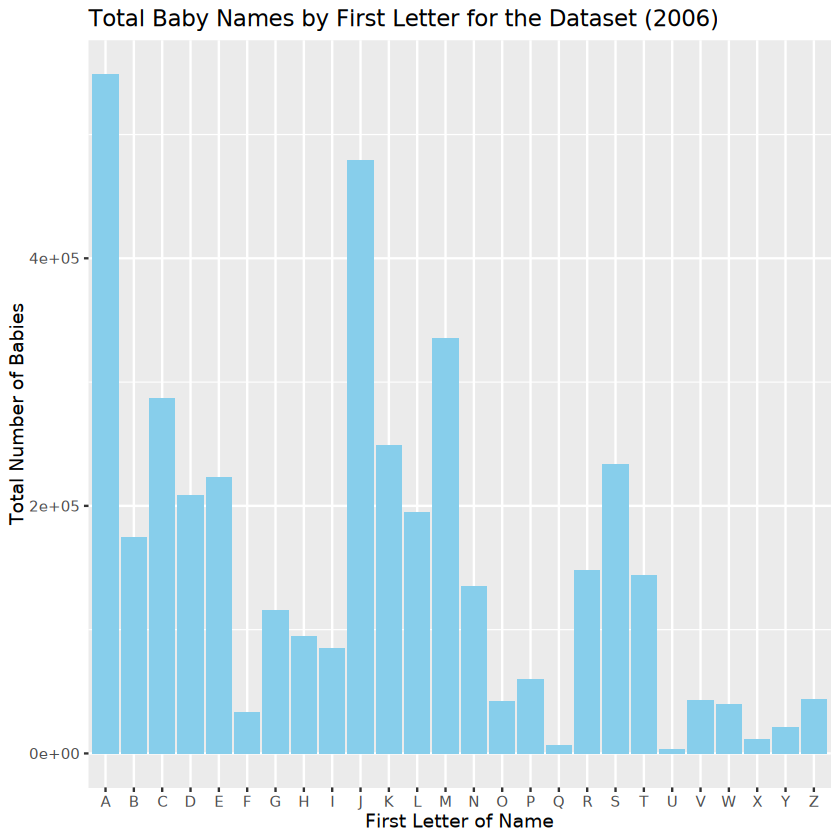

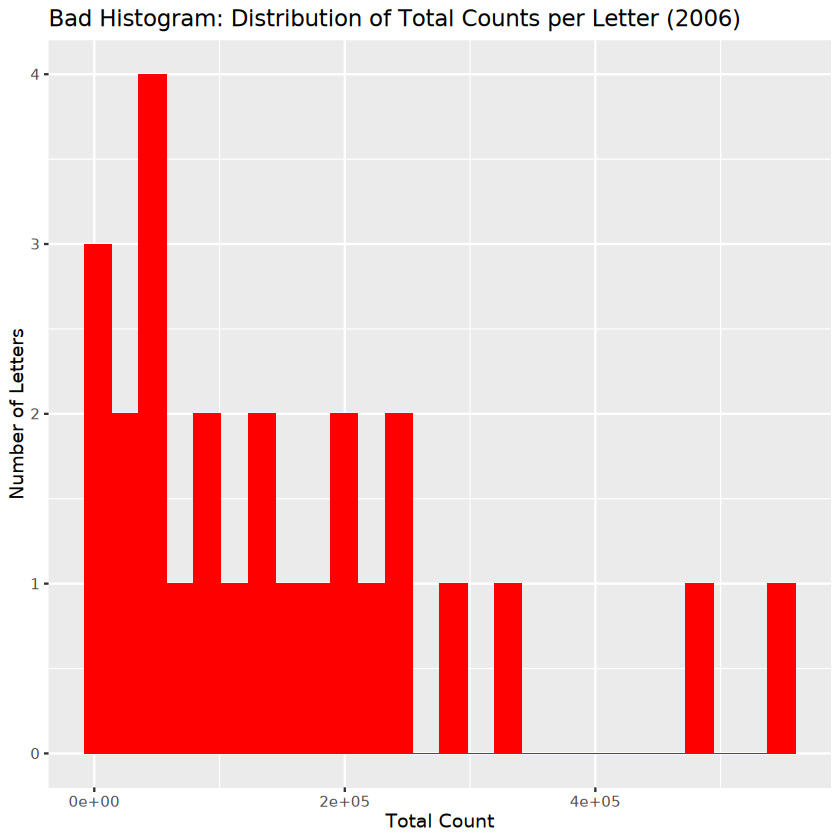

In [3]:
df_grouped <- myDF %>%
  mutate(first_letter = substr(Name, 1, 1)) %>%
  group_by(first_letter) %>%
  summarise(total_count = sum(Counts))
ggplot(df_grouped, aes(x = first_letter, y = total_count)) +
  geom_col(fill = "skyblue") +
  labs(title = "Total Baby Names by First Letter for the Dataset (2006)",
       x = "First Letter of Name",
       y = "Total Number of Babies")
ggplot(df_grouped, aes(x = total_count)) +geom_histogram(bins =26, fill = "red" ) +  labs(title = "Bad Histogram: Distribution of Total Counts per Letter (2006)",
       x = "Total Count",
       y = "Number of Letters")


# Explanation of Code

- **Line 1:** Starts with the dataset `myDF` and uses the pipe operator `%>%` to perform a sequence of transformations in a clean, readable format.

- **Line 2:** Creates a new column called `first_letter` using `mutate()`.  
  The `substr(Name, 1, 1)` function extracts the first character from each baby name, representing the first letter of that name.

- **Line 3:** Groups the dataset by the `first_letter` column using `group_by()`.  
  This prepares the data so that summary statistics can be calculated for each group (each unique first letter).

- **Line 4:** Summarizes the grouped data using `summarise()`.  
  The `sum(Counts)` function calculates the total number of babies whose names start with each letter, storing this value in a new column called `total_count`.  
  The result is stored in a new data frame named `df_grouped`.

- **Line 5:** Initializes a ggplot object using `df_grouped` as the dataset, mapping `first_letter` to the x-axis and `total_count` to the y-axis.  
  This sets up the structure for a bar chart.

- **Line 6:** Adds the `geom_col()` layer, which creates bars with heights equal to the actual `total_count` values.  
  The bars are filled with the color `"skyblue"` to visually distinguish them.

- **Line 7–9:** Use `labs()` to add a descriptive title and axis labels to the bar chart.  
  The plot now shows the total number of babies for each first letter in the 2006 dataset.

- **Line 10:** Starts another ggplot object using the same grouped data, but this time maps only `total_count` to the x-axis.  
  This prepares the base for a histogram of total counts.

- **Line 11:** Adds a histogram layer using `geom_histogram()`.  
  The argument `bins = 26` divides the x-axis into 26 intervals (one per letter), and the bars are filled in red to create the “bad” histogram described in the question.

- **Line 12–14:** Add labels and a title to the histogram using `labs()`.  
  The histogram displays how total name counts are distributed across letters, but it’s intentionally meaningless for categorical data, as each bar no longer represents a specific letter.


# Question 2: Plotting with ggplot2

---

### 2.1 Group the Data
We grouped the 2006 Baby Names dataset by the first letter of each name and calculated the total number of babies for each letter.  
This produced a new dataframe named `df_grouped` with two columns:  
- `first_letter` → the first character of each name (A–Z)  
- `total_count` → the total number of babies whose names start with that letter  

This grouping step helps summarize the dataset in a more compact form, allowing us to visualize the popularity of each initial letter.

---

### 2.2 Barplot of Distributions Across Letters
A barplot was created to visualize how many baby names start with each of the 26 letters.  
We used `geom_col()` instead of `geom_bar()` because the data was **already pre-aggregated**. `geom_col()` directly plots the provided totals, while `geom_bar()` is used when ggplot needs to calculate counts automatically.  
The resulting plot shows the variation in the number of babies based on the first letter of their names, with taller bars representing more common initials like **A**, **E**, or **J**.

---

### 2.3 Histogram of the Counts (Intentionally “Bad”)
Next, we created a histogram showing how the total counts themselves are distributed.  
This histogram is intentionally **not meaningful**, since it uses grouped totals instead of continuous numeric data. It shows how many letters fall into certain count ranges but loses the connection to which letters they represent.  
Histograms are better suited for **continuous or large numeric data**—for instance, plotting the distribution of all individual baby name counts or population numbers. In this context, it serves as a clear example of when **not** to use a histogram.



## Question 3

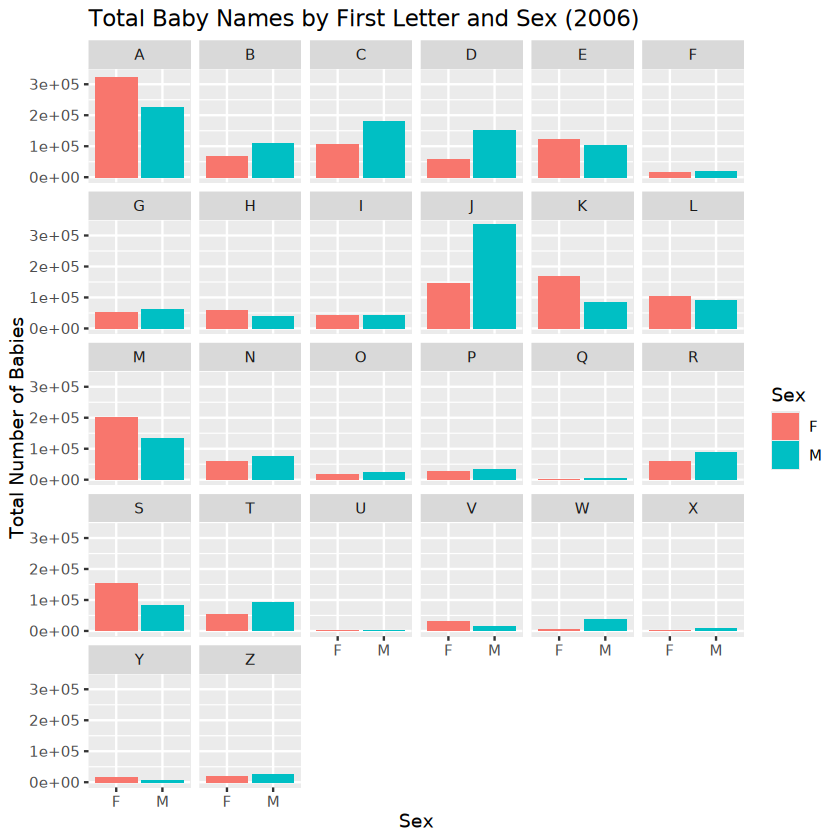

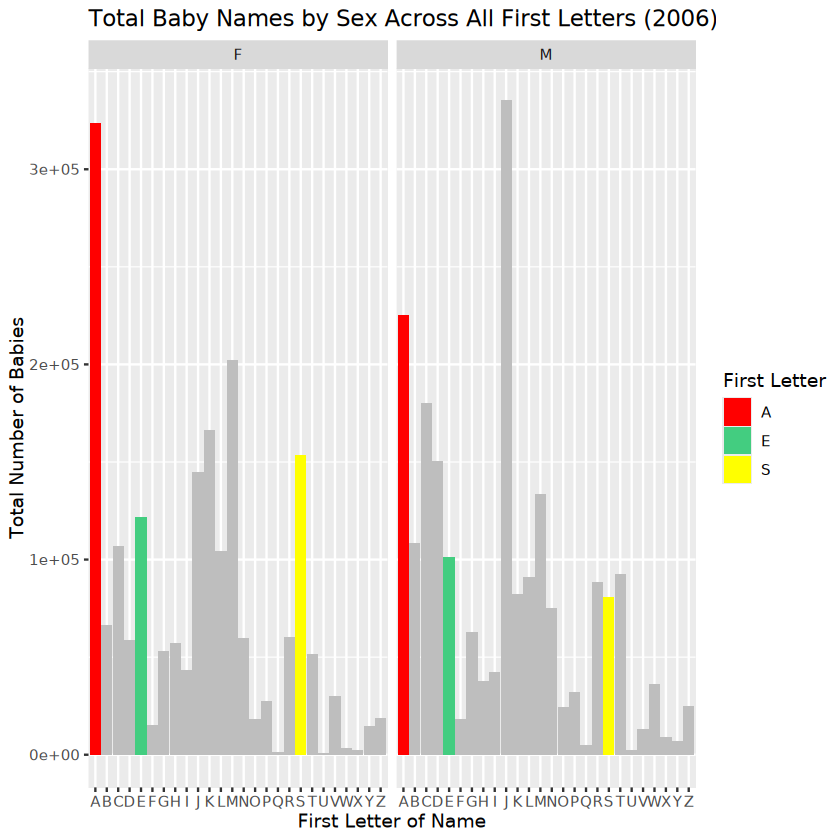

In [4]:
df_grouped_again <- myDF %>%
  mutate(first_letter = substr(Name, 1, 1)) %>%
  group_by(first_letter, Sex) %>%
  summarise(total_count = sum(Counts), .groups = 'drop')

ggplot(df_grouped_again, aes(x = Sex, y = total_count, fill = Sex)) +
  geom_col() +
  facet_wrap(~first_letter) + labs(
    title = "Total Baby Names by First Letter and Sex (2006)",
    x = "Sex",
    y = "Total Number of Babies",
    fill = "Sex"
  )
ggplot(df_grouped_again, aes(x = first_letter, y = total_count, fill = first_letter)) +
  geom_col() +
  facet_wrap(~Sex) +
  scale_fill_manual(
    values = c("A" = "red", "E" = "seagreen3", "S" = "yellow"),
    na.value = "grey"
  ) +
  labs(
    title = "Total Baby Names by Sex Across All First Letters (2006)",
    x = "First Letter of Name",
    y = "Total Number of Babies",
    fill = "First Letter"
  )



# Explanation of Code

- **Line 1:** Begins with the original dataset `myDF` and uses the pipe operator `%>%` to perform multiple transformations in sequence for readability.

- **Line 2:** Uses `mutate()` to create a new column called `first_letter`.  
  The `substr(Name, 1, 1)` function extracts the first character from each baby name, storing it as the first letter of the name.

- **Line 3:** Groups the data by both `first_letter` and `Sex` using `group_by()`.  
  This allows summarization to be performed separately for each combination of letter and gender.

- **Line 4:** Uses `summarise()` to calculate the total number of babies for each group by summing up the values in the `Counts` column.  
  The argument `.groups = 'drop'` ensures that the resulting dataframe is ungrouped after summarization.  
  The result is saved as a new dataframe named `df_grouped_again`.



- **Line 6:** Starts the first ggplot visualization using `df_grouped_again` as the dataset.  
  The aesthetics (`aes`) map the x-axis to `Sex`, the y-axis to `total_count`, and the fill color to `Sex`.

- **Line 7:** Adds `geom_col()`, which creates bars where the height corresponds directly to the value of `total_count`.  
  Since the data is already summarized, `geom_col()` is more appropriate than `geom_bar()`.

- **Line 8:** Applies `facet_wrap(~first_letter)`, which creates a separate small plot (facet) for each first letter of the alphabet, showing both male and female counts within each facet.

- **Lines 9–13:** Use `labs()` to add a descriptive title, axis labels, and a legend label for clarity.  
  The title explains that the chart compares male and female baby name counts by first letter for the year 2006.



- **Line 14:** Starts the second ggplot visualization using the same summarized dataframe.  
  This time, the x-axis is mapped to `first_letter`, the y-axis to `total_count`, and the fill color to `first_letter` so each letter can have its own color.

- **Line 15:** Adds `geom_col()` again to draw bars representing total baby counts per letter.

- **Line 16:** Uses `facet_wrap(~Sex)` to create separate plots for each gender (F and M).  
  Each facet shows how total baby name counts vary across the 26 letters for that specific gender.

- **Lines 17–20:** Apply `scale_fill_manual()` to manually assign colors to selected letters.  
  Here, the letters **A**, **E**, and **S** are highlighted in **red**, **seagreen3**, and **yellow** respectively, while all other letters are shown in **grey**.  
  This helps visually emphasize specific letters across both male and female categories.

- **Lines 21–26:** Use `labs()` to add a descriptive title and axis labels to the second plot.  
  The title indicates that the plot displays total baby names by sex across all first letters, while the legend (`fill`) clarifies that the colors correspond to the first letters of names.


## Question 4

 num [1:13212] NA NA NA NA NA NA NA NA NA NA ...
 num [1:13212] NA NA NA NA NA NA NA NA NA NA ...


[1] 8367

[1] 8966

`geom_smooth()` using formula = 'y ~ x'


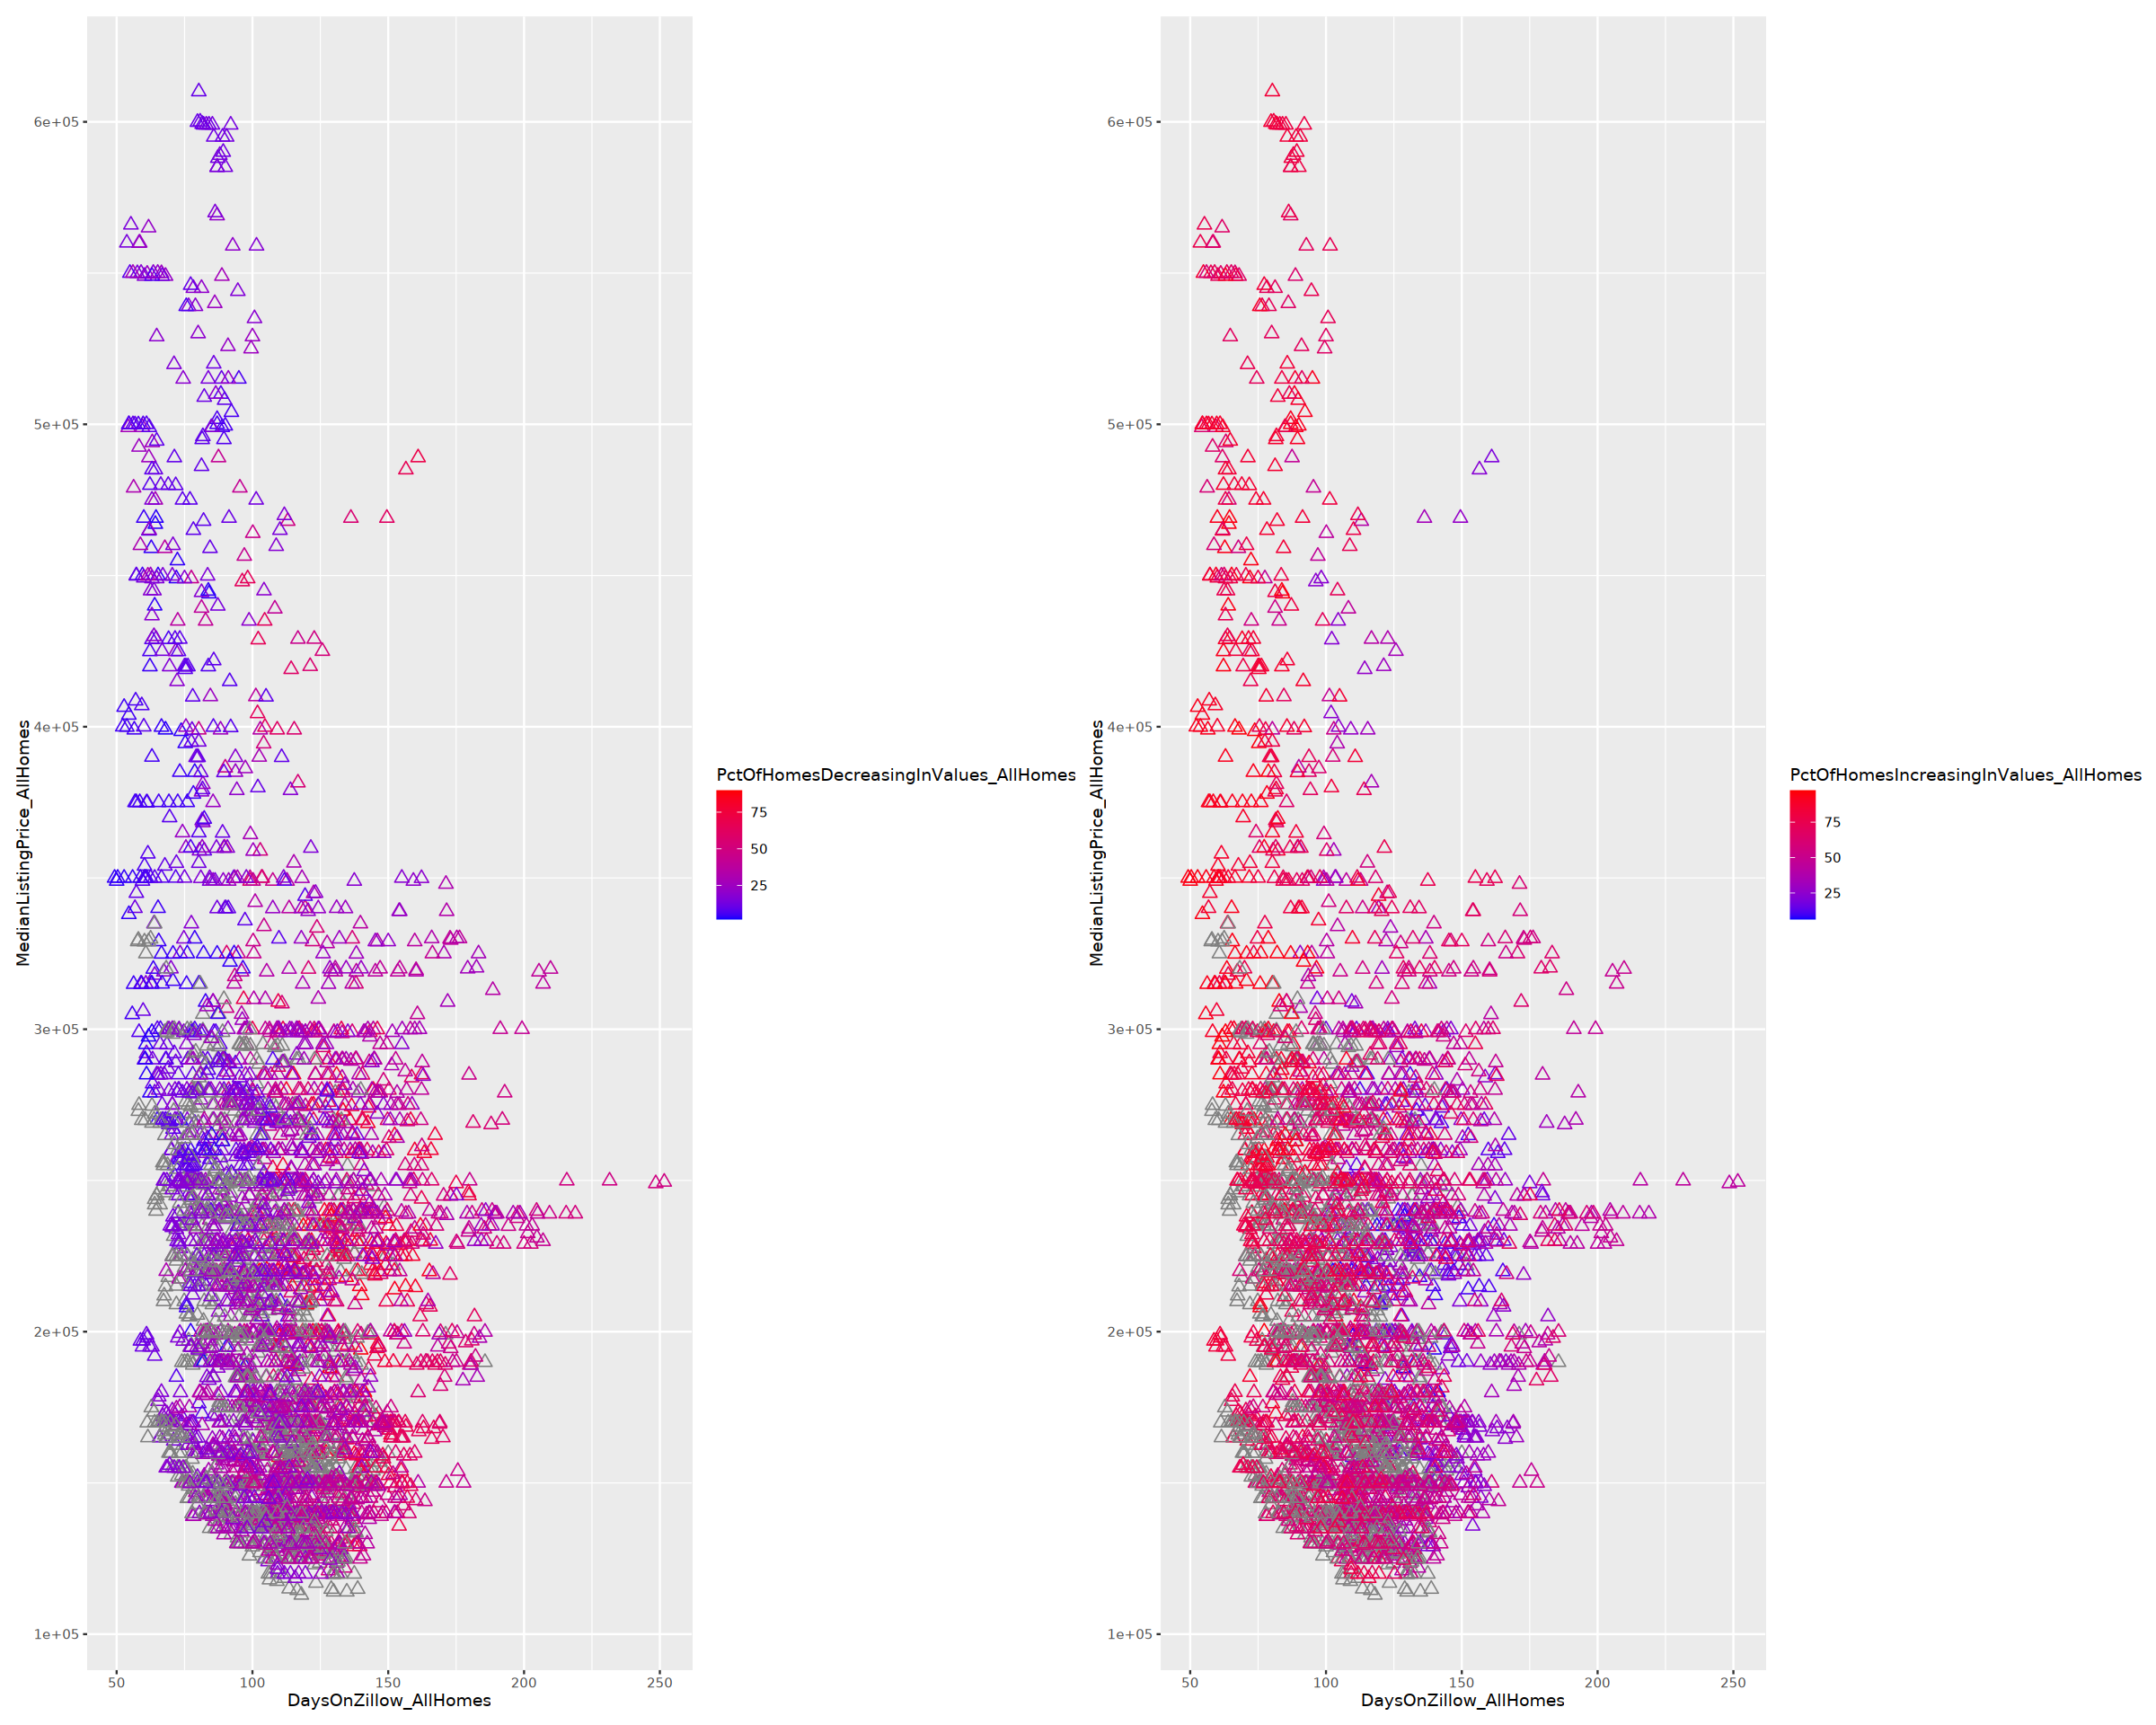

`geom_smooth()` using formula = 'y ~ x'


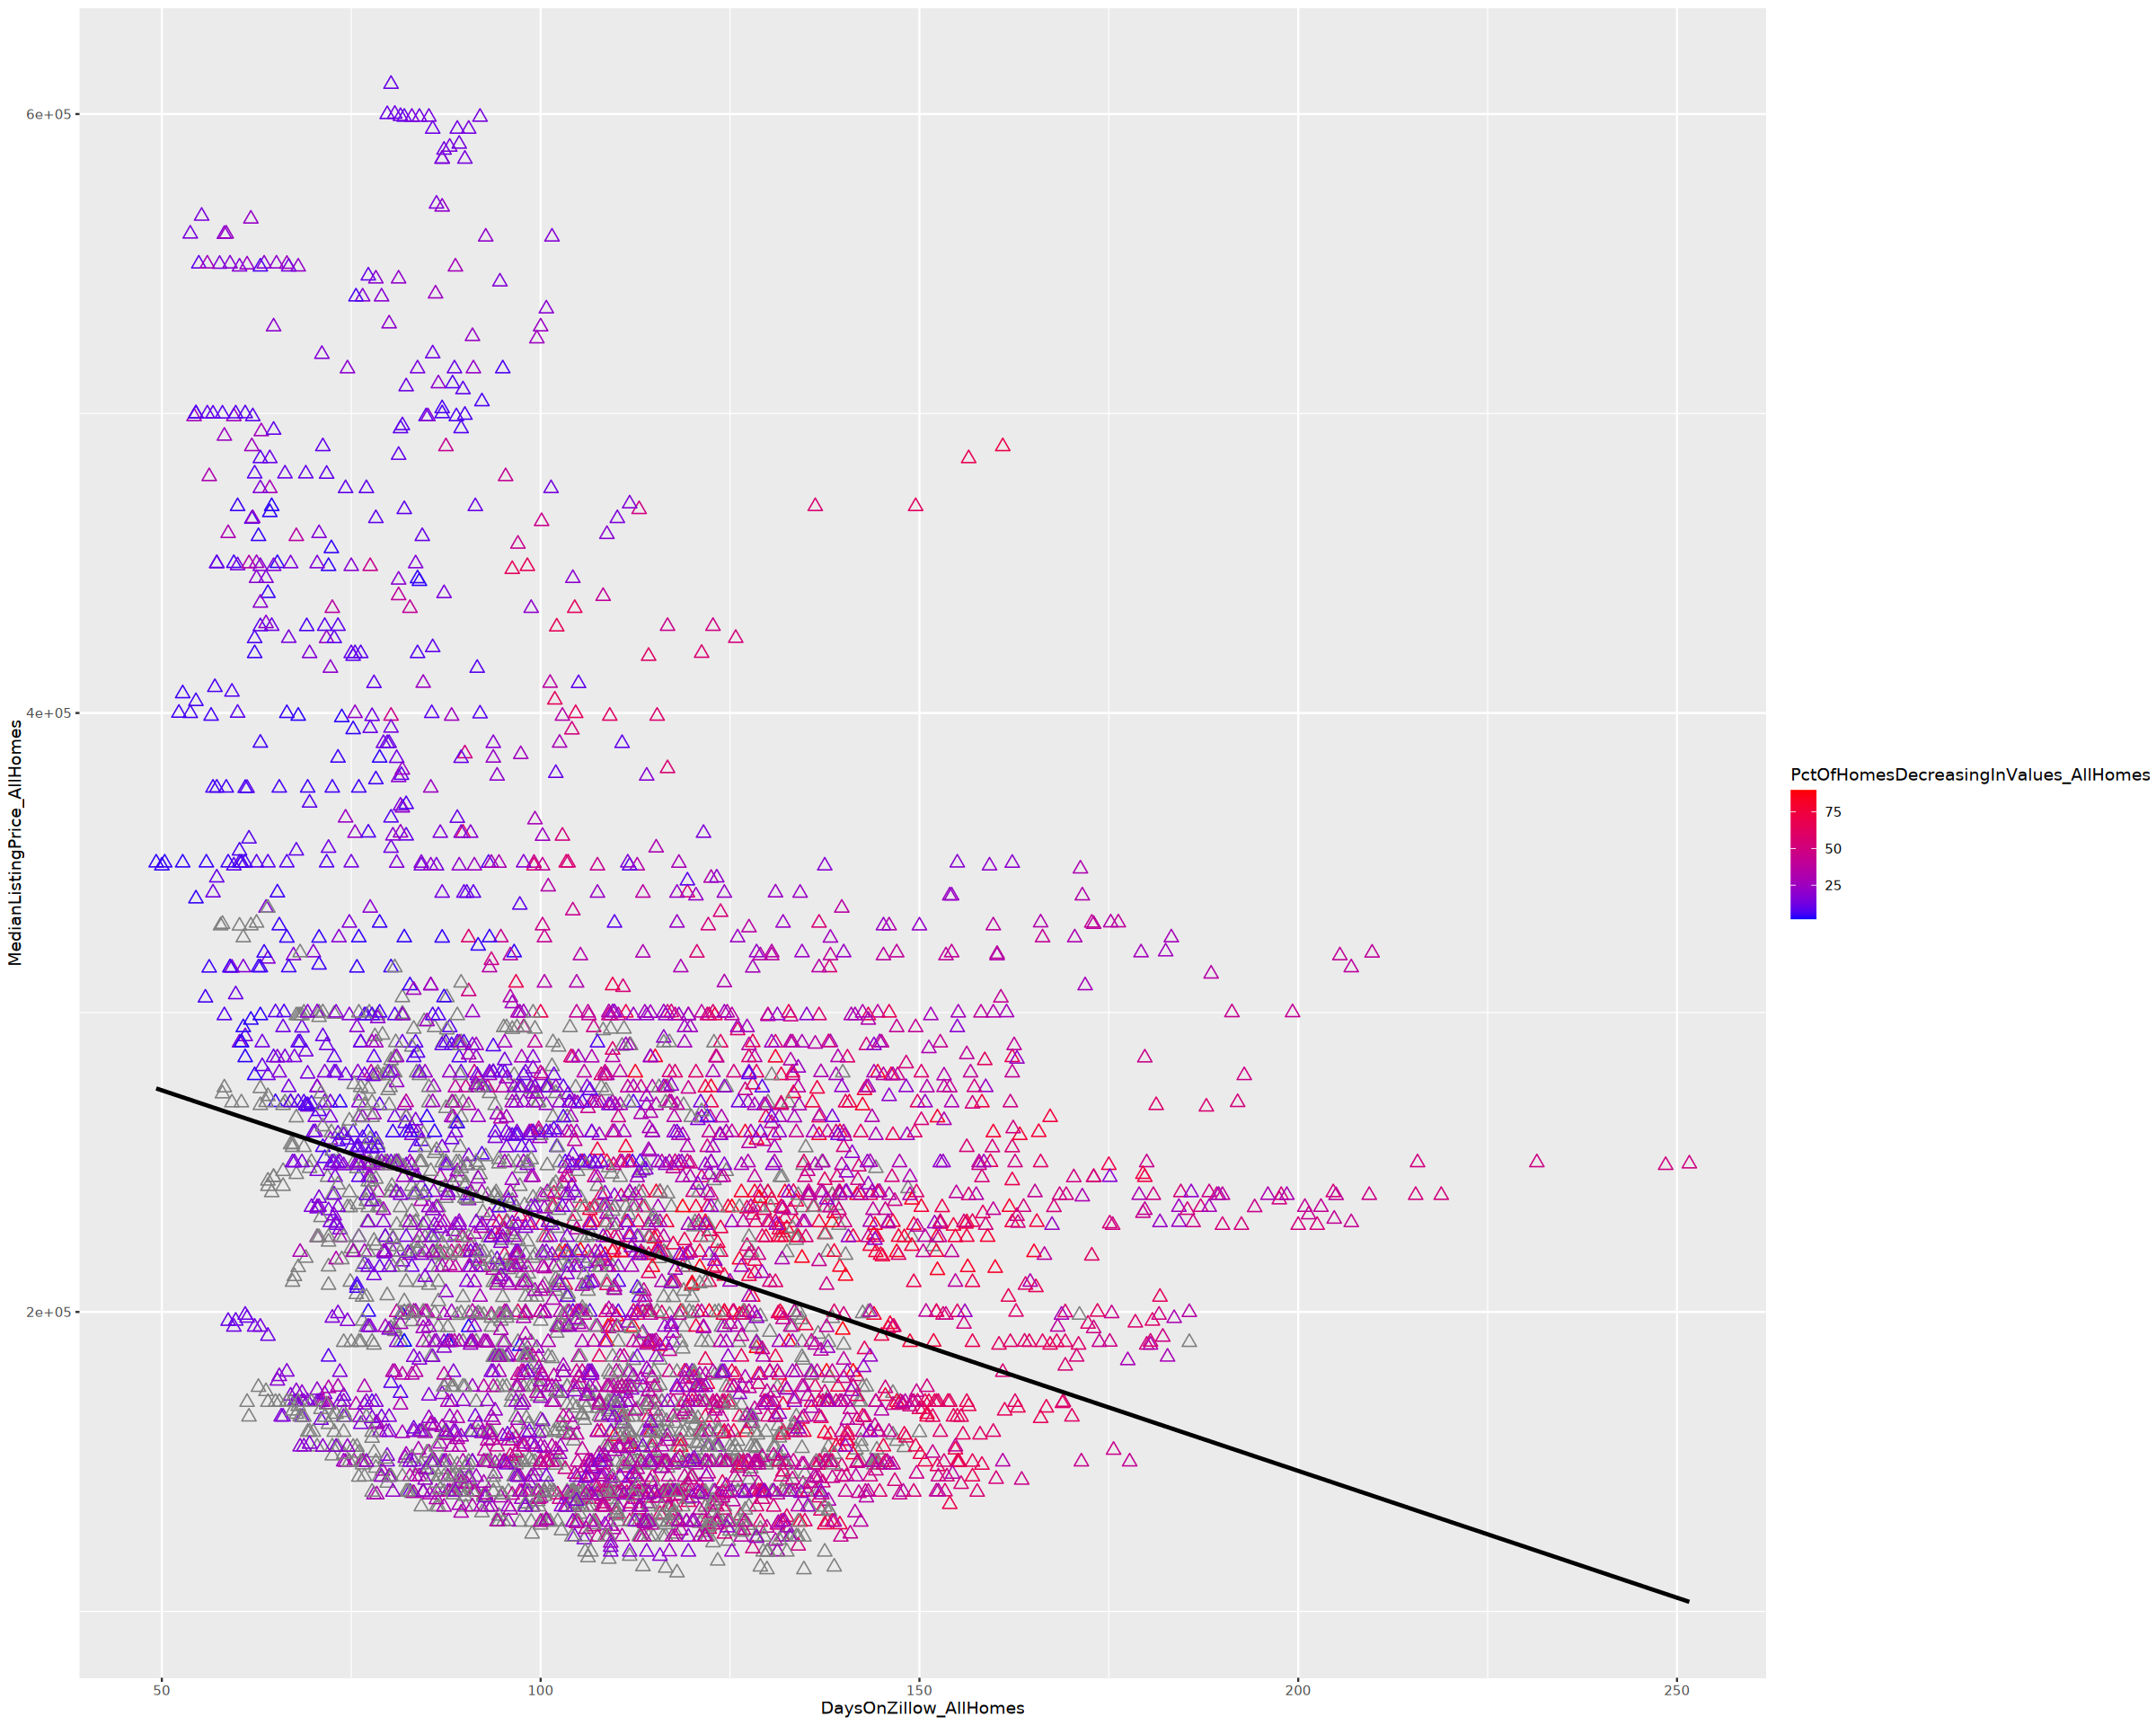

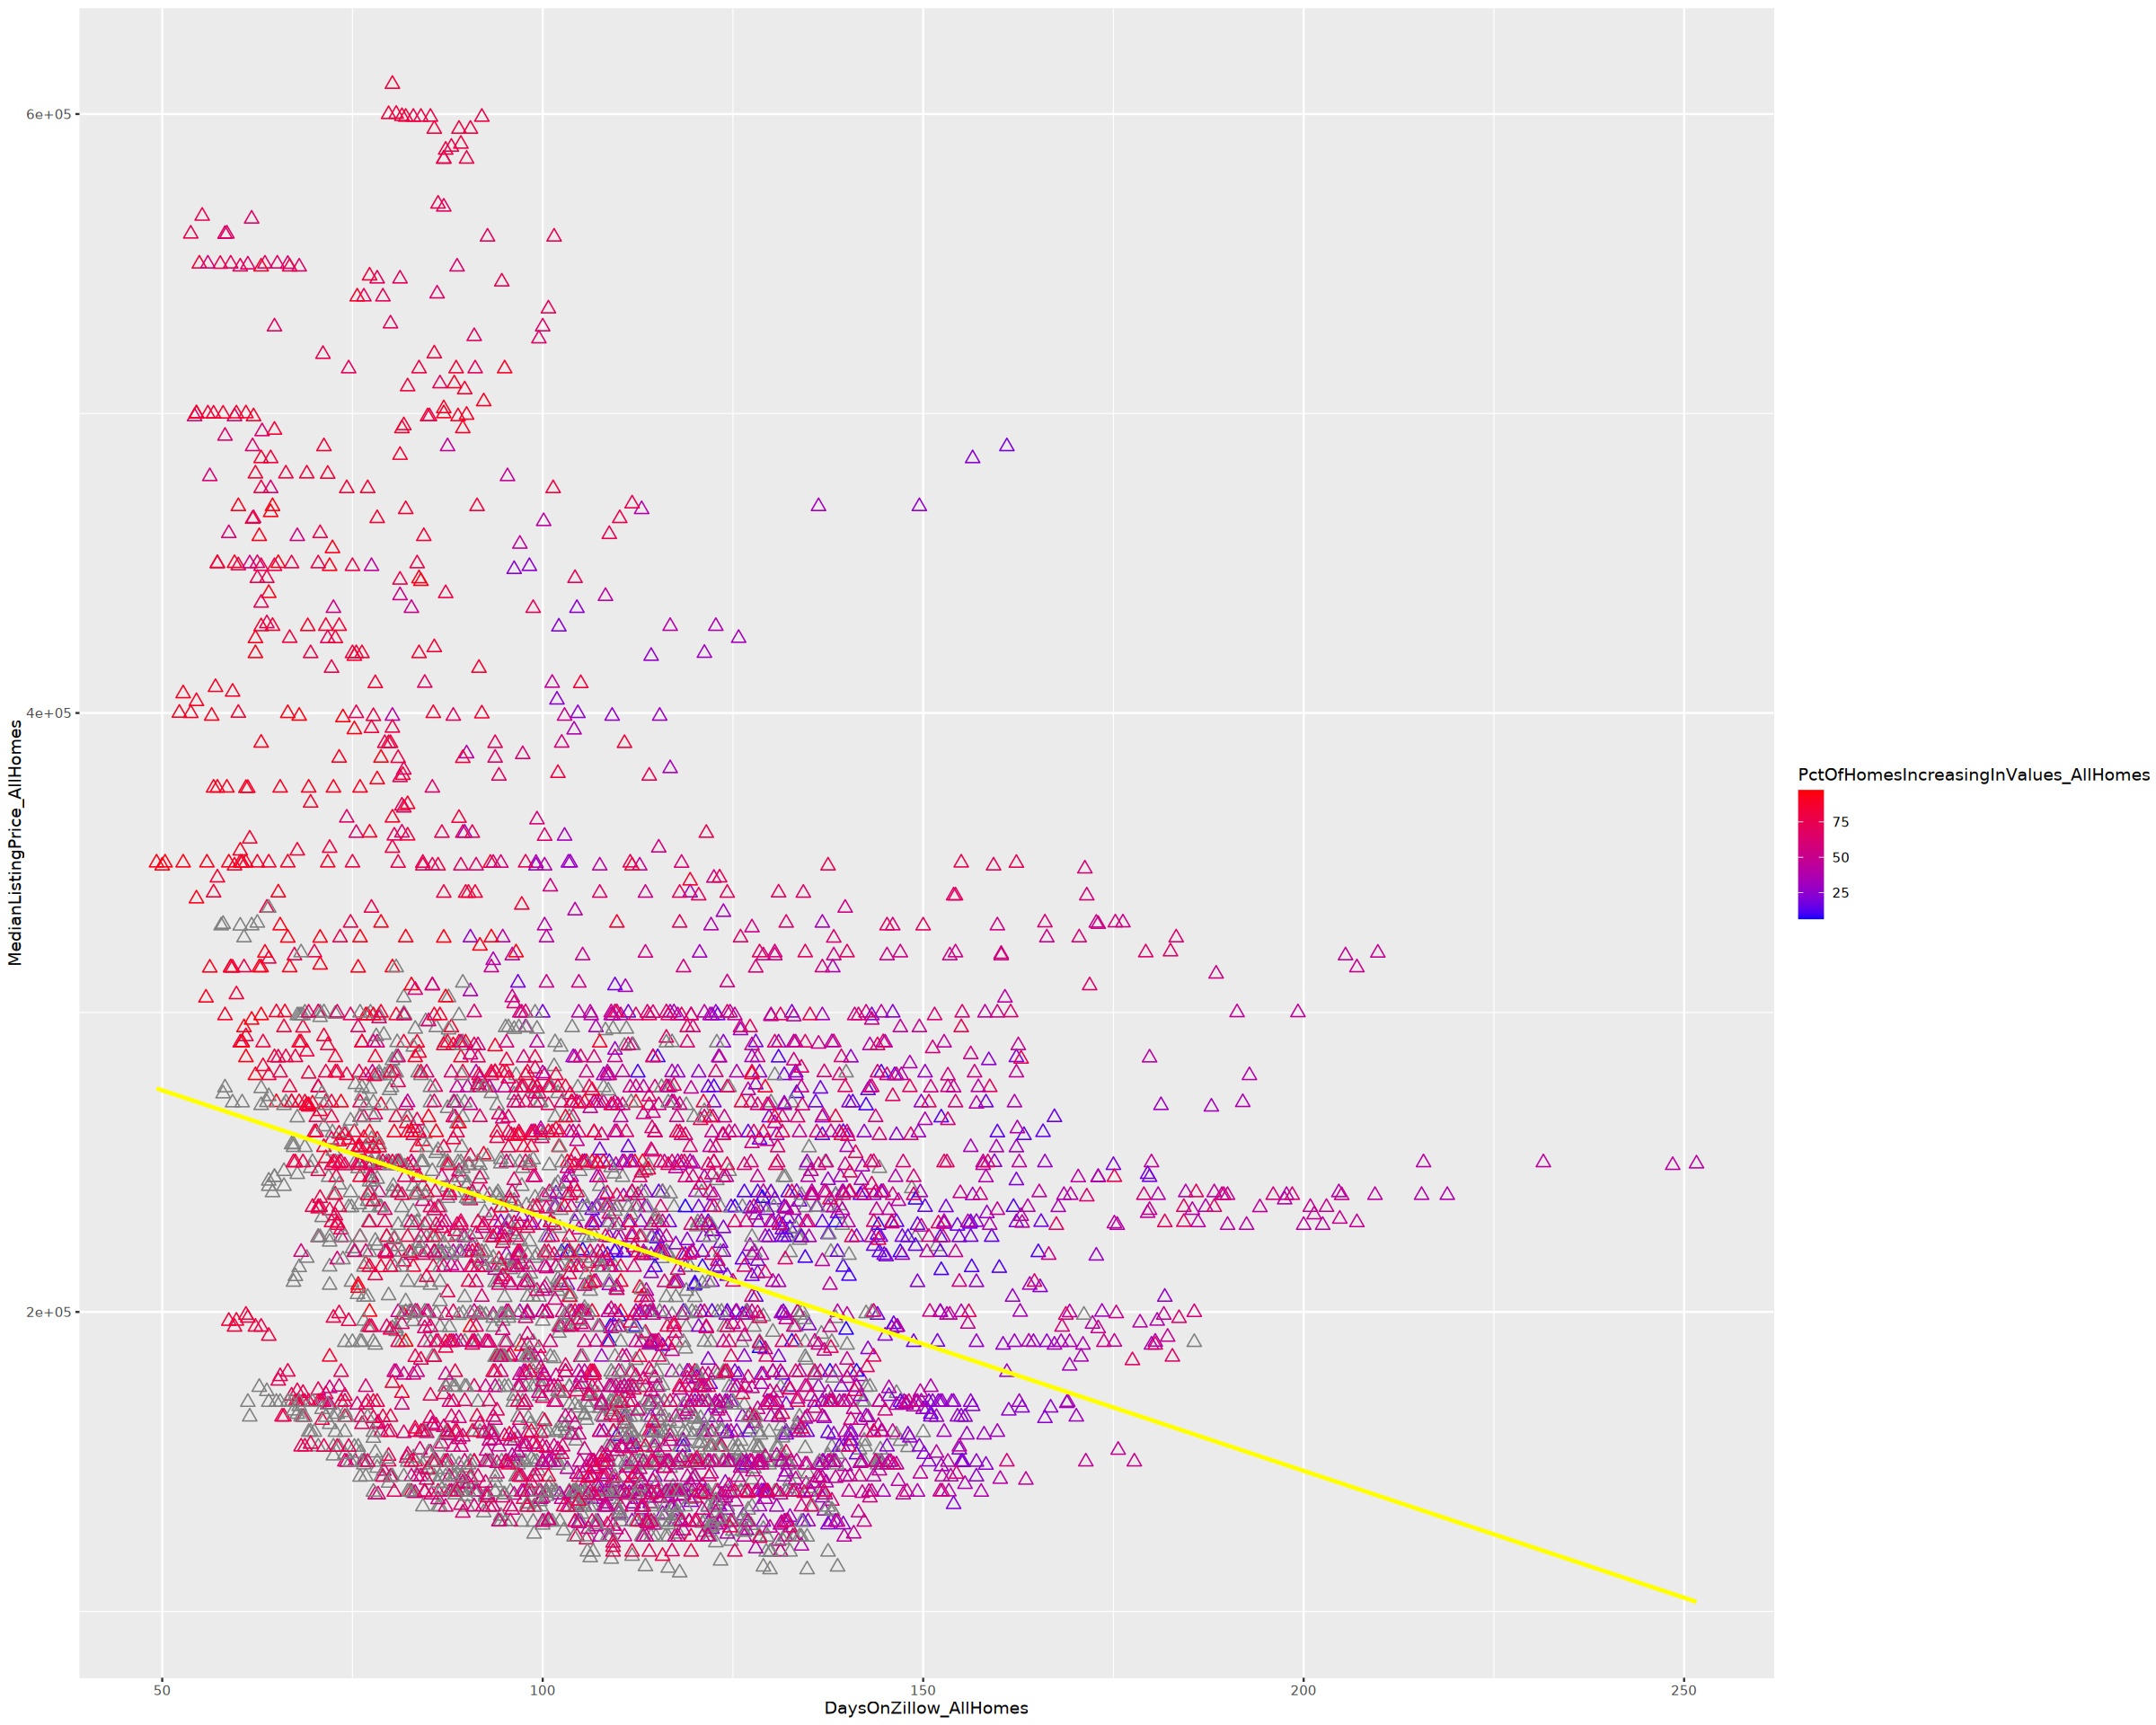

In [2]:
library(patchwork)
zillow = read.csv("/anvil/projects/tdm/data/zillow/State_time_series.csv")
str(zillow$DaysOnZillow_AllHomes)
str(zillow$MedianListingPrice_AllHomes)
sum(is.na(zillow$DaysOnZillow_AllHomes))
sum(is.na(zillow$MedianListingPrice_AllHomes))
zillow_cleaned <- zillow %>%
  filter(!is.na(DaysOnZillow_AllHomes),
         !is.na(MedianListingPrice_AllHomes))
options(repr.plot.width = 20, repr.plot.height = 16)
p1 <-ggplot(zillow_cleaned, aes(x = DaysOnZillow_AllHomes, y = MedianListingPrice_AllHomes, color=PctOfHomesDecreasingInValues_AllHomes )) +
  geom_point( size = 3, shape = 2) + 
scale_color_gradient(low = "blue", high = "red")
p2<- ggplot(zillow_cleaned, aes(x = DaysOnZillow_AllHomes, y = MedianListingPrice_AllHomes, color=PctOfHomesIncreasingInValues_AllHomes )) +
  geom_point( size = 3, shape = 2) + 
scale_color_gradient(low = "blue", high = "red")


p1 + p2
p1 <- p1 + geom_smooth(method = "lm", se = FALSE, color = "black")
p2 <- p2 + geom_smooth(method = "lm", se = FALSE, color = "yellow")
p1
p2

# Explanation of Code

- **Line 1:** Reads the Zillow housing dataset from the specified file path using `read.csv()` and stores it in a dataframe called `zillow`.  
  This dataset contains state-level housing statistics such as listing prices, days on market, and value change percentages.

- **Line 2:** Uses `str()` to display the internal structure of the column `DaysOnZillow_AllHomes`.  
  This shows information such as the data type (e.g., numeric, integer) and a preview of its values.

- **Line 3:** Uses `str()` again, this time to examine the `MedianListingPrice_AllHomes` column to understand its data type and structure.  
  These checks help confirm that the variables to be plotted are numeric.

- **Line 4:** Calculates the total number of missing (`NA`) values in the `DaysOnZillow_AllHomes` column using `sum(is.na())`.  
  This step identifies how many records have incomplete data for the number of days homes have been listed.

- **Line 5:** Repeats the missing value count for the `MedianListingPrice_AllHomes` column to determine how many entries are missing median listing price data.
x
- **Lines 6–8:** Create a cleaned version of the dataset called `zillow_cleaned` by removing rows that have missing values (`NA`) in either `DaysOnZillow_AllHomes` or `MedianListingPrice_AllHomes`.  
  The `filter(!is.na(...))` function from `dplyr` ensures that only complete records remain in the dataset.

---

- **Line 9:** Initializes the first ggplot object `p1` using the cleaned dataset.  
  It maps the x-axis to `DaysOnZillow_AllHomes`, the y-axis to `MedianListingPrice_AllHomes`, and colors points based on `PctOfHomesDecreasingInValues_AllHomes`.  
  The `options()` function defines the size of the plotting window for better visibility.

- **Line 10:** Adds a `geom_point()` layer to plot individual data points, setting the point size to `3` and the shape to `2` (a hollow triangle).  
  This creates a scatterplot of median listing price versus days on market.

- **Line 11:** Uses `scale_color_gradient()` to apply a continuous color gradient from blue (low values) to red (high values) for the color aesthetic.  
  This visually represents the percentage of homes decreasing in value.

---

- **Line 12:** Creates another ggplot object `p2` with the same x and y axes as `p1`, but colors points according to `PctOfHomesIncreasingInValues_AllHomes`.  
  Like before, `options()` defines the output dimensions for the plot.

- **Line 13:** Adds the same point geometry layer as in `p1` to `p2`, with identical point size and shape for consistency.

- **Line 14:** Adds a color gradient to `p2` where blue represents lower percentages and red represents higher percentages of homes increasing in value.

---

- **Line 15:** Loads the `patchwork` library, which allows multiple ggplot objects to be easily combined into one visualization layout.

- **Line 16:** Combines plots `p1` and `p2` side by side using the `+` operator.  
  This displays both scatterplots next to each other for direct comparison of homes decreasing vs. increasing in value.

---

- **Line 17:** Enhances plot `p1` by adding a regression line using `geom_smooth(method = "lm")`, which fits a linear model to the data.  
  The argument `se = FALSE` removes the confidence interval shading, and `color = "black"` sets the line color.

- **Line 18:** Adds a similar regression line to `p2`, but uses `color = "yellow"` to differentiate it visually.  
  This shows the general trend between median listing price and days on market for homes increasing in value.

- **Line 19:** Displays the updated plot `p1` with its regression line included.

- **Line 20:** Displays the updated plot `p2` with its corresponding regression line.  
  Together, these visualizations show how listing price relates to time on market, highlighting differences between states where home values are increasing versus decreasing.

### Explanation  

We cleaned the dataset by removing all rows with missing values in the **DaysOnZillow_AllHomes** and **MedianListingPrice_AllHomes** columns.  
This ensured that only complete observations were used for plotting, eliminating null values from these two variables.  

However, some points still appear **grey** in the scatterplot because they have missing values in the color-mapped columns — **PctOfHomesIncreasingInValues_AllHomes** or **PctOfHomesDecreasingInValues_AllHomes**.  
Since these missing values were not removed during cleaning, ggplot2 automatically assigns a neutral grey color to indicate their absence in the color gradient.

- The scatterplots show a **negative relationship** between listing price and days on Zillow — higher-priced homes tend to sell faster.  
- **Clusters** appear around lower prices and shorter listing periods, while **outliers** show expensive homes staying longer.  
- The **downward trendline** indicates that as homes remain listed longer, their median prices tend to drop.


## Question 5

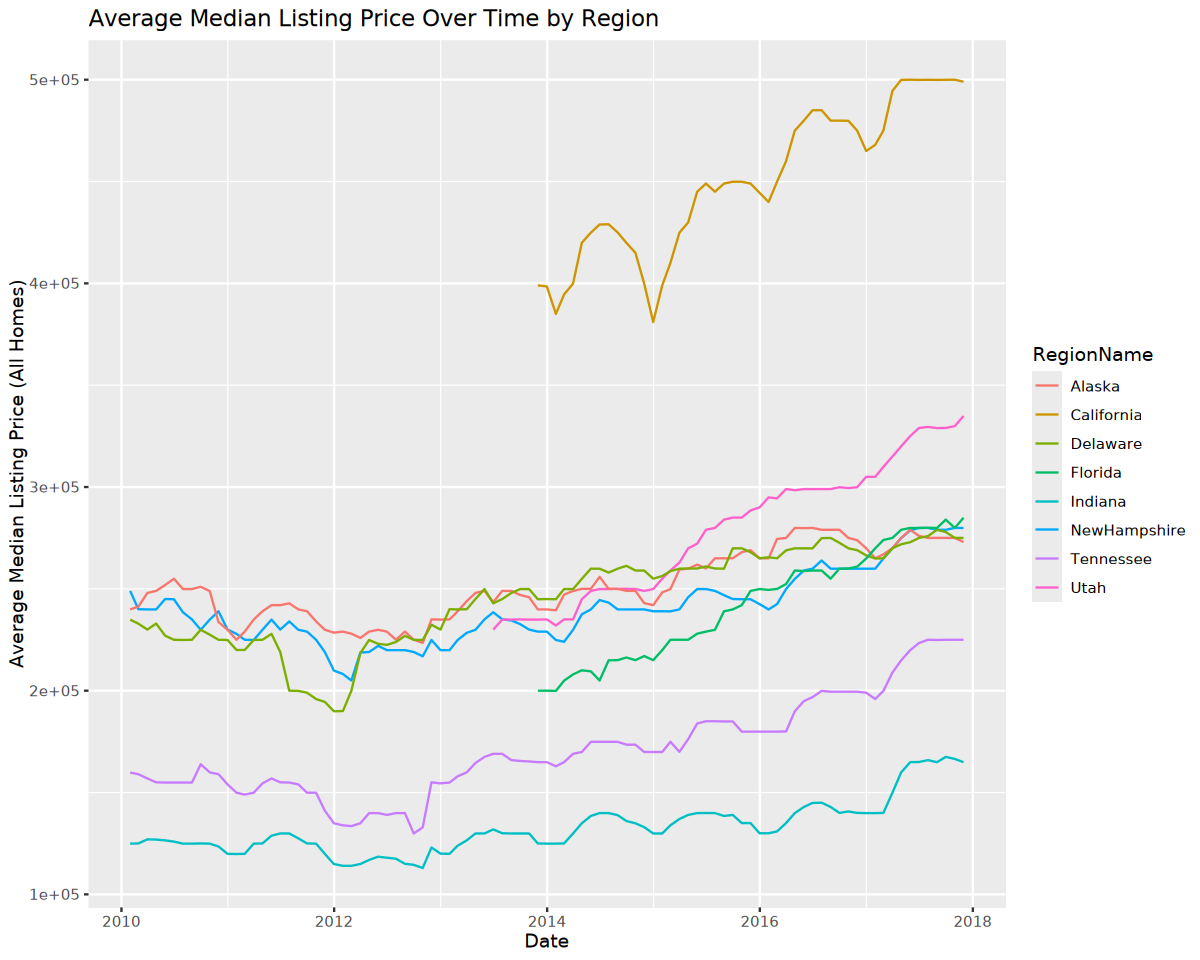

In [3]:
library(tidyverse)
library(patchwork)

zillow_cleaned$Date <- as.Date(zillow_cleaned$Date)

selected_regions <- c("Indiana", "Tennessee", "Utah", "NewHampshire")

zillow_grouped_small <- zillow_cleaned %>%
  filter(RegionName %in% selected_regions) %>%
  group_by(Date, RegionName) %>%
  summarise(
    avg_price = mean(MedianListingPrice_AllHomes, na.rm = TRUE),
    .groups = "drop"
  )
options(repr.plot.width = 10, repr.plot.height = 8)
p <- ggplot(zillow_grouped_small,
            aes(x = Date,
                y = avg_price,
                color = RegionName,
                group = RegionName)) +

  geom_line() +  
  labs(
    title = "Average Median Listing Price Over Time by Region",
    x = "Date",
    y = "Average Median Listing Price (All Homes)"
  )

more_selected_regions <- c("California", "Delaware", "Florida", "Alaska")

zillow_grouped_more <- zillow_cleaned %>%
  filter(RegionName %in% more_selected_regions) %>%
  group_by(Date, RegionName) %>%
  summarise(
    avg_price = mean(MedianListingPrice_AllHomes, na.rm = TRUE),
    .groups = "drop"
  )

p + geom_line(data = zillow_grouped_more,
              aes(x = Date,
                  y = avg_price,
                  color = RegionName,
                  group = RegionName)) 



### Explanation of Code

#### 1. Load required libraries
We load the **tidyverse** library for data manipulation and visualization, and **patchwork** for combining multiple ggplot objects.

#### 2. Convert Date column to proper date format
The `Date` column in `zillow_cleaned` is converted to the `Date` class using `as.Date()`.  
This ensures that ggplot2 recognizes the variable as a date when plotting time series.

#### 3. Select specific regions
We create a vector `selected_regions` containing four states — *Indiana*, *Tennessee*, *Utah*, and *New Hampshire*.  
These will be used to filter the dataset.

#### 4. Filter and group the data
Using `filter(RegionName %in% selected_regions)`, we keep only the rows corresponding to the selected regions.  
Then, we group the filtered data by both **Date** and **RegionName** to calculate summary statistics for each region over time.

#### 5. Compute the average median listing price
Inside `summarise()`, we calculate the average of `MedianListingPrice_AllHomes` for each region and date, storing it as `avg_price`.  
The argument `.groups = "drop"` ensures the resulting dataframe is no longer grouped.

#### 6. Create the first plot (p)
We use `ggplot()` to create a line plot showing how the **average median listing price** changes over time for each selected region.  
- `aes()` maps `Date` to the x-axis, `avg_price` to the y-axis, and colors each line by `RegionName`.  
- `geom_line()` draws the trend lines.  
- `labs()` adds a title and axis labels for clarity.

#### 7. Define a new set of regions
We define another vector, `more_selected_regions`, containing *California*, *Delaware*, *Florida*, and *Alaska* for additional comparison.

#### 8. Filter and summarize for new regions
Similar to before, we filter `zillow_cleaned` to include these four regions and calculate their average median listing price per date using `group_by()` and `summarise()`.

#### 9. Add new lines to the existing plot
Finally, we use the `+` operator to add another `geom_line()` layer to the existing plot `p`.  
This overlays the price trends of the new four regions on top of the earlier ones, allowing visual comparison between all selected states.

### Handling NA Values
The dataset had already been cleaned earlier by removing rows with missing values in **DaysOnZillow_AllHomes** and **MedianListingPrice_AllHomes**.  
Therefore, no additional cleaning was needed for this step.  
While grouping and summarizing, the code still included `na.rm = TRUE` inside the `mean()` function to ensure that any remaining missing entries (if present) were ignored during averaging.

### Interpretation of the Final Line Plot (5.3)
The line plot illustrates how **average median listing prices** changed over time across eight U.S. states.  
**California** and **Florida** show the **highest prices** and **steepest upward trends**, reflecting rapid growth in expensive housing markets.  
In contrast, **Indiana**, **Tennessee**, and **Utah** display **lower and steadier trends**, indicating more affordable and stable housing markets over the same period.



## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/
